## Project:- "Sentiment Analysis Classifier From Scratch"   

In this project, I have developed a sentiment analysis classifier system from scratch, I have used Logistic regression for developing it from very scratch, In my next project I have the developed the same using deep neural networks. 
I have divided this project into sections, so whoever is seeing my project can easily understand the code for this project. 

Approach:-  

- I have use logistic regression model, developed from scratch without using any libraries.


In [2]:
### Importing necessary libraries ### 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline  

import re 
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer 


In [3]:
### Importing the data 

data = pd.read_csv("data/data.csv", encoding='latin', names = ['label','id','date','query','user','text'])
data.head()

,label,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Exploratory Data Analysis  

In [4]:
print("Shape of the data", data.shape)

Shape of the data (1600000, 6)


In [5]:
Unique_labels = data["label"].unique() 
print(Unique_labels) 

[0 4]


From the Analysis, It seems that we are classifying the positive sentiments as a 4 and negative sentiments as 0. 
<br> 
But It will be better, If replace 4 with 1, So it will be more reasonable. 

In [6]:
data["label"] = data["label"].replace(4,1) # replacing 4 with 1 

Now, we have replace, Now I am going to remove some columns which are not necessary. 

In [7]:
# Removing the unnecessary columns.
data.drop(['date','query','id','user'], axis=1, inplace=True)

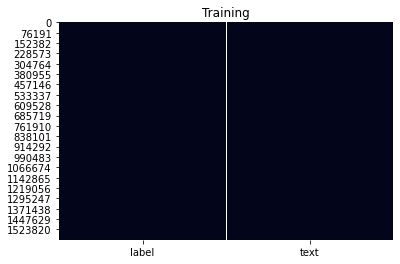

In [8]:
# Checking for any missing values 
sns.heatmap(data.isnull(), cbar=False)
plt.title("Training")
plt.show()

In [9]:
sample_positive_tweets = data["text"][data.label == 1].sample(5) 
sample_negative_tweets = data["text"][data.label == 0].sample(5) 

In [10]:
print("Following are an examples of sample positive tweets:- :) \n")  
print(sample_positive_tweets) 
print("\nFollowing are an examples of sample negative tweets:- :(\n ") 
print(sample_negative_tweets)

Following are an examples of sample positive tweets:- :) 

1006311    Im off to bed I gotta get some rest..I got a b...
842265     i need to talk to you @mynameiskaraaaa  well m...
1091617    @DavidArchie Fly to FL...I wanna see &quot;UP&...
1305908                                 aaannnnd we're back 
1070734    @basseyworld oh lawd...I forgot about that one...
Name: text, dtype: object

Following are an examples of sample negative tweets:- :(
 
359226    @brandonbeemer Hi Brandon, Just wanted to say ...
287648    Went to for a run. Wasn't the best cuz left le...
250613    @sydlawrence Ok how exactly did I lose that on...
685229                                            Hangover 
594716    y can't ghostbusters come out on 360 in uk  ti...
Name: text, dtype: object


In [33]:
# classification of positive and negative tweets  

positive_tweets = data["text"][data.label == 1] 
negative_tweets = data["text"][data.label == 0]  

print("Shape of the positive tweets:- \b", positive_tweets.shape) 
print("Shape of the negative tweets:- \b", negative_tweets.shape) 

# we will be dividing the data 80% for training set and 20% for testing set  

train_positive = positive_tweets[:720000].tolist() 
test_positive = positive_tweets[720000:].tolist()  
train_negative = negative_tweets[:720000].tolist()
test_negative = negative_tweets[720000:].tolist()   

# combining both training and testing positive and negative  

train_x = train_positive + train_negative 
test_x  = test_positive + test_negative

print("===================================================")

print("Training Size:- \b", len(train_x)) 
print("Testing Size:- \b", len(test_x))

train_y = np.append(np.ones((len(train_positive),1)), np.zeros((len(train_negative),1)), axis=0)  
test_y = np.append(np.ones((len(test_positive),1)), np.zeros((len(test_negative),1)), axis=0)

print("===================================================") 

print("Y Training Size:- \b", len(train_y))
print("Y Testing Size:- \b", len(test_y))

Shape of the positive tweets:-  (800000,)
Shape of the negative tweets:-  (800000,)
Training Size:-  1440000
Testing Size:-  160000
Y Training Size:-  1440000
Y Testing Size:-  160000


### Text Preprocessing 

In [12]:
def process_tweet(tweet):
    
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

# building freqs for each word 

def build_freqs(tweets, ys):
    print("Started building your freqs, be patient for a while :) ")
    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs

In [13]:
freqs = build_freqs(train_x, train_y) 

Started building your freqs, be patient for a while :) 


In [14]:
print("The Type of the freqs:- ", type(freqs)) 
print("Length of the frequency:- ", len(freqs.keys()))

The Type of the freqs:-  <class 'dict'>
Length of the frequency:-  318134


## Model Building  

In [39]:
def Sigmoid(z): 
    h_x = 1 / (1 + np.exp(-z))  
    return h_x

In [40]:
def gradientDescent(x, y, theta, alpha, num_iters):
    m = len(y)
    for i in range(0, num_iters):
        z = np.dot(x, theta)
        h = Sigmoid(z)
        J = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
        theta =  theta -  alpha/m * (np.dot(x.T, (h-y)))
    return J, theta

In [16]:
def extract_features(tweet, freqs):
    
    word_l = process_tweet(tweet)
    x = np.zeros((1, 3)) 
    x[0,0] = 1 
    for word in word_l:
        x[0,1] += freqs.get((word, 1.0),0)
        x[0,2] += freqs.get((word, 0.0),0)
    assert(x.shape == (1, 3))
    return x

In [23]:
### Training the model ### 
import warnings # optional 
warnings.filterwarnings( "ignore" )
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

In [41]:
Y = train_y

J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 10, 1500)
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The resulting vector of weights is [179.90234432, 1361776.27758036, -976077.16008127]


In [42]:
def predict_tweet(tweet, freqs, theta):
    x = extract_features(tweet, freqs)    
    y_pred = Sigmoid(np.dot(x, theta))    
    return y_pred

### Testing and Evaluating the model 

In [43]:
def test_logistic_regression(test_x, test_y, freqs, theta):
    y_hat = []
    for tweet in test_x:
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)    
    return accuracy

In [44]:
accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {accuracy:.4f}")

Logistic regression model's accuracy = 0.6365


In [53]:
predict_tweet("The movie was bad", freqs, theta)

array([[0.]])

In [55]:
predict_tweet("I am good", freqs, theta)

array([[1.]])